In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import us # THIS IS AMERICA
pd.set_option('display.max_rows', 200)

In [2]:
apple_data_path = "../data/applemobilitytrends-2020-06-06.csv"
google_data_path = "../data/Global_Mobility_Report.csv"

In [3]:
apple_data = pd.read_csv(apple_data_path)
google_data = pd.read_csv(google_data_path)

c:\users\lukas\.virtualenvs\trackingcovid-iy_jhukv\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
apple_data.head()

,geo_type,region,transportation_type,alternative_name,sub-region,country,2020-01-13,2020-01-14,2020-01-15,2020-01-16,...,2020-05-28,2020-05-29,2020-05-30,2020-05-31,2020-06-01,2020-06-02,2020-06-03,2020-06-04,2020-06-05,2020-06-06
0,country/region,Albania,driving,NaN,NaN,NaN,100.0,95.30,101.43,97.20,...,66.11,67.85,67.47,68.61,90.62,88.33,89.97,84.30,93.46,102.16
1,country/region,Albania,walking,NaN,NaN,NaN,100.0,100.68,98.93,98.46,...,67.16,69.89,56.67,59.53,84.18,93.86,87.72,94.75,83.24,81.96
2,country/region,Argentina,driving,NaN,NaN,NaN,100.0,97.07,102.45,111.21,...,43.77,48.26,40.39,23.77,39.64,41.88,43.77,45.84,52.26,47.48
3,country/region,Argentina,walking,NaN,NaN,NaN,100.0,95.11,101.37,112.67,...,32.63,34.67,28.70,17.40,29.50,31.25,30.65,31.93,37.34,33.53
4,country/region,Australia,driving,AU,NaN,NaN,100.0,102.98,104.21,108.63,...,88.37,92.70,73.04,78.07,80.87,84.72,88.62,100.24,104.34,83.85


In [5]:
google_data.head()

,country_region_code,country_region,sub_region_1,sub_region_2,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,AE,United Arab Emirates,NaN,NaN,2020-02-15,0.0,4.0,5.0,0.0,2.0,1.0
1,AE,United Arab Emirates,NaN,NaN,2020-02-16,1.0,4.0,4.0,1.0,2.0,1.0
2,AE,United Arab Emirates,NaN,NaN,2020-02-17,-1.0,1.0,5.0,1.0,2.0,1.0
3,AE,United Arab Emirates,NaN,NaN,2020-02-18,-2.0,1.0,5.0,0.0,2.0,1.0
4,AE,United Arab Emirates,NaN,NaN,2020-02-19,-2.0,0.0,4.0,-1.0,2.0,1.0


## Group Apple Data by County

In [6]:
apple_data["geo_type"].unique()

array(['country/region', 'city', 'sub-region', 'county'], dtype=object)

In [7]:
# Set up grouping by country 
by_county = apple_data[apple_data["geo_type"] == "county"].copy()
by_county.head()

,geo_type,region,transportation_type,alternative_name,sub-region,country,2020-01-13,2020-01-14,2020-01-15,2020-01-16,...,2020-05-28,2020-05-29,2020-05-30,2020-05-31,2020-06-01,2020-06-02,2020-06-03,2020-06-04,2020-06-05,2020-06-06
1535,county,Abbeville County,driving,NaN,South Carolina,United States,100.0,110.87,112.13,119.64,...,172.09,186.75,192.22,136.75,161.85,169.99,160.17,153.72,176.86,181.70
1536,county,Acadia Parish,driving,NaN,Louisiana,United States,100.0,115.17,120.94,124.35,...,164.33,194.66,165.18,147.61,146.37,152.09,154.45,169.90,190.84,166.79
1537,county,Accomack County,driving,NaN,Virginia,United States,100.0,98.93,99.53,107.75,...,140.06,189.70,236.45,200.30,173.96,154.97,160.59,185.50,225.98,271.12
1538,county,Ada County,driving,NaN,Idaho,United States,100.0,99.89,105.05,108.43,...,147.78,163.16,140.38,108.03,139.08,146.68,147.51,154.80,169.29,147.03
1539,county,Adair County,driving,NaN,Kentucky,United States,100.0,98.00,96.97,112.05,...,143.10,159.94,154.67,119.79,130.01,132.64,142.14,130.81,171.51,160.97


In [8]:
# Make sure US is the only country 
by_county["country"].unique()

array(['United States'], dtype=object)

In [9]:
# We only have driving data for this? 
by_county["transportation_type"].unique()

array(['driving'], dtype=object)

In [10]:
# drop unecessary columns 
by_county.drop(["geo_type", "alternative_name"], axis=1, inplace=True)

In [11]:
# Melt date columns to rows 
apple_data_melted = by_county.melt(id_vars=["region", "transportation_type", 
                                            "sub-region", "country"], 
                                  var_name="date",
                                  value_name="mobility_from_baseline")

In [12]:
apple_data_melted.head()

,region,transportation_type,sub-region,country,date,mobility_from_baseline
0,Abbeville County,driving,South Carolina,United States,2020-01-13,100.0
1,Acadia Parish,driving,Louisiana,United States,2020-01-13,100.0
2,Accomack County,driving,Virginia,United States,2020-01-13,100.0
3,Ada County,driving,Idaho,United States,2020-01-13,100.0
4,Adair County,driving,Kentucky,United States,2020-01-13,100.0


In [13]:
# rename cols 
apple_data_melted.rename({"sub-region": "state",
                          "region": "county"}, 
                         axis=1, inplace=True)
# apple_data_melted.set_index(["county", "date"], inplace=True)
# apple_data_melted.sort_index().head()
# apple_data_melted.reset_index(inplace=True)
apple_data_melted.head()

,county,transportation_type,state,country,date,mobility_from_baseline
0,Abbeville County,driving,South Carolina,United States,2020-01-13,100.0
1,Acadia Parish,driving,Louisiana,United States,2020-01-13,100.0
2,Accomack County,driving,Virginia,United States,2020-01-13,100.0
3,Ada County,driving,Idaho,United States,2020-01-13,100.0
4,Adair County,driving,Kentucky,United States,2020-01-13,100.0


## Group Google Data by County

In [14]:
google_data["sub_region_1"].unique()

array([nan, 'Abu Dhabi', 'Ajman', ..., 'Matabeleland North Province',
       'Matabeleland South Province', 'Midlands Province'], dtype=object)

In [15]:
google_data["sub_region_2"].unique()

array([nan, 'Autauga County', 'Baldwin County', ..., 'Uinta County',
       'Washakie County', 'Weston County'], dtype=object)

In [16]:
# sub_region 2 is all US counties
google_by_county = google_data[~google_data["sub_region_2"].isna()].copy()
google_by_county.head() # We want this format for the Apple Data

,country_region_code,country_region,sub_region_1,sub_region_2,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
184274,US,United States,Alabama,Autauga County,2020-02-15,5.0,7.0,NaN,NaN,-4.0,NaN
184275,US,United States,Alabama,Autauga County,2020-02-16,0.0,1.0,-23.0,NaN,-4.0,NaN
184276,US,United States,Alabama,Autauga County,2020-02-17,8.0,0.0,NaN,NaN,-27.0,5.0
184277,US,United States,Alabama,Autauga County,2020-02-18,-2.0,0.0,NaN,NaN,2.0,0.0
184278,US,United States,Alabama,Autauga County,2020-02-19,-2.0,0.0,NaN,NaN,2.0,0.0


In [17]:
# rename cols, drop unecessary cols 
google_by_county.rename({"sub_region_2":"county",
                         "sub_region_1":"state",
                         "country_region":"country"},
                        axis=1, inplace=True)
google_by_county.drop("country_region_code", axis=1, inplace=True)


google_new_index = google_by_county.set_index(["county", "date"]) # no longer needed 
google_by_county.head()

,country,state,county,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
184274,United States,Alabama,Autauga County,2020-02-15,5.0,7.0,NaN,NaN,-4.0,NaN
184275,United States,Alabama,Autauga County,2020-02-16,0.0,1.0,-23.0,NaN,-4.0,NaN
184276,United States,Alabama,Autauga County,2020-02-17,8.0,0.0,NaN,NaN,-27.0,5.0
184277,United States,Alabama,Autauga County,2020-02-18,-2.0,0.0,NaN,NaN,2.0,0.0
184278,United States,Alabama,Autauga County,2020-02-19,-2.0,0.0,NaN,NaN,2.0,0.0


## Grouping Data

In [18]:
google_by_county.reset_index(inplace=True, drop=True)
google_by_county.shape

(276591, 10)

In [19]:
apple_data_melted.reset_index(inplace=True, drop=True)
apple_data_melted.shape

(305140, 6)

In [20]:
cols_to_include = google_new_index.columns.difference(apple_data_melted.columns) # just want metrics from google
cols_to_include

Index(['grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'residential_percent_change_from_baseline',
       'retail_and_recreation_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline'],
      dtype='object')

In [21]:
# inner vs outer has some weird effects ?
# merged_data = apple_data_melted.join(google_new_index[cols_to_include], how='inner')
# #merged_data.drop(["country_region", "country_region_code"], axis=1, inplace=True)
# merged_data.head()

In [22]:
apple_data_melted.head()

,county,transportation_type,state,country,date,mobility_from_baseline
0,Abbeville County,driving,South Carolina,United States,2020-01-13,100.0
1,Acadia Parish,driving,Louisiana,United States,2020-01-13,100.0
2,Accomack County,driving,Virginia,United States,2020-01-13,100.0
3,Ada County,driving,Idaho,United States,2020-01-13,100.0
4,Adair County,driving,Kentucky,United States,2020-01-13,100.0


In [23]:
# inner join drops apple data up to 2/15, so baseline may need to be re-normalized
merged_data = pd.merge(google_by_county, apple_data_melted, on=["county", "state", "date", "country"])

merged_data.drop("country", axis=1, inplace=True) # omitting country for now 

### Notes on baselines:

Apple and Google calculated baselines differently. Google's baseline is on a per-weekday basis, while Apple uses a specific day in January as the baseline. Will they need to be re-calculated to be in the same units or does it not matter ? 

In [24]:
merged_data[merged_data["state"] == "Florida"].head(200)

,state,county,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,transportation_type,mobility_from_baseline
22688,Florida,Alachua County,2020-02-15,3.0,2.0,4.0,-3.0,0.0,-1.0,driving,143.37
22689,Florida,Alachua County,2020-02-16,3.0,-1.0,3.0,-5.0,-3.0,0.0,driving,108.81
22690,Florida,Alachua County,2020-02-17,2.0,-3.0,11.0,2.0,-16.0,3.0,driving,107.82
22691,Florida,Alachua County,2020-02-18,2.0,0.0,9.0,4.0,2.0,0.0,driving,107.65
22692,Florida,Alachua County,2020-02-19,0.0,-2.0,17.0,0.0,1.0,0.0,driving,110.22
22693,Florida,Alachua County,2020-02-20,0.0,-1.0,2.0,-2.0,2.0,0.0,driving,116.62
22694,Florida,Alachua County,2020-02-21,-1.0,-3.0,-19.0,-3.0,0.0,1.0,driving,140.65
22695,Florida,Alachua County,2020-02-22,-1.0,-2.0,3.0,-3.0,0.0,0.0,driving,135.36
22696,Florida,Alachua County,2020-02-23,1.0,0.0,20.0,-4.0,1.0,0.0,driving,102.54
22697,Florida,Alachua County,2020-02-24,0.0,-1.0,10.0,2.0,2.0,0.0,driving,100.90


In [25]:
merged_data.shape

(211781, 11)

## Handling Missing Data

Both Google and Apple have made sure to leave out mobility data on dates that it is nonexistant or too sparse to apporpriately annonomyse the data. In counties where a particular column is completely NA, we will fill with 0. In counties where there are some dates missing in a column, we will fill NA values with the mean value for that column at that date accross the country. Lastly, Apple has announced that their data for 5/11 and 5/12 are missing, which we will fill with linear interpolation, since this is only a two day gap in data. 

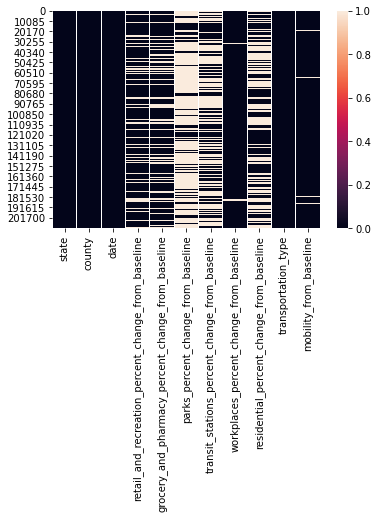

In [26]:
is_na_df = merged_data.apply(pd.isna)
sns.heatmap(is_na_df)

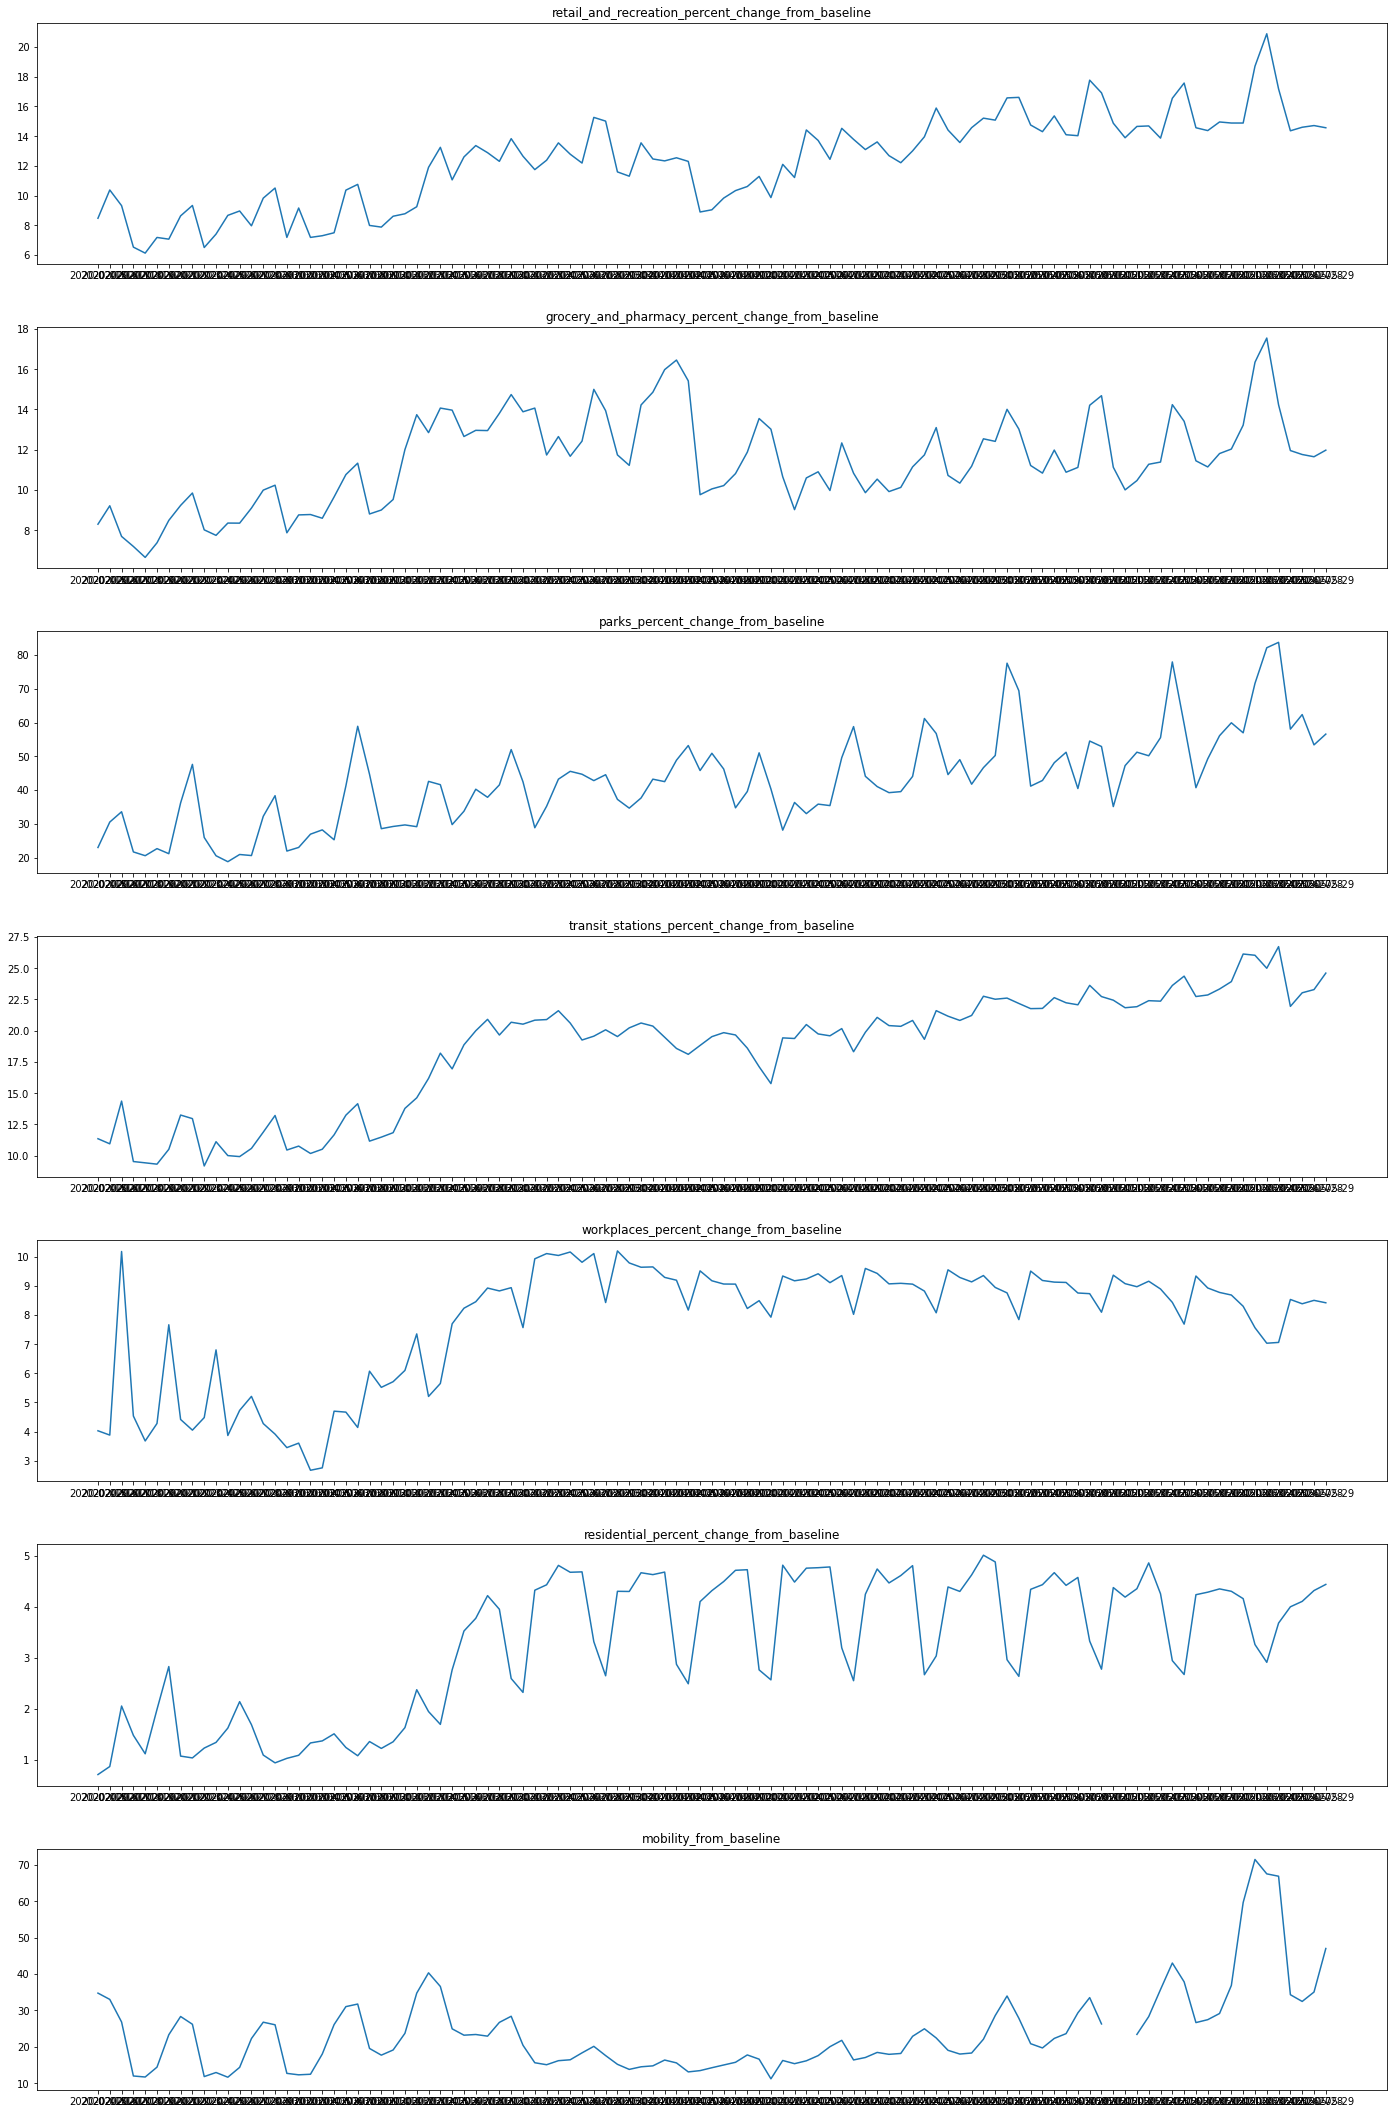

In [27]:
mobility_var = merged_data.groupby("date").agg('std')
fig, axs = plt.subplots(7, figsize=(20,30))
for i, col in enumerate(mobility_var.columns):
    axs[i].plot(mobility_var.index, mobility_var[col])
    axs[i].set_title(col)

fig.tight_layout(pad=3)


Conclusion: The parks column has the largest variance and is mostly empty. We may want to consider removing it as a feature. Additionally, it is interesting to see that many of the columns have increasing variance in mobility as time increases. This increase suggests that a division of the population is starting to go out more while there still exists a group that is remaining home. 

In [28]:
na_example_before = merged_data[(merged_data["county"] == "Baker County") &
                                (merged_data["state"] == "Florida")]
na_example_before["parks_percent_change_from_baseline"].isnull().all()

True

In [30]:


# needs work

mobility_daily_mean = merged_data.groupby('date').agg('mean')
cols = [col for col in mobility_daily_mean if col != "mobility_from_baseline"]

for group, county_data in merged_data.groupby(['county', 'state']):
    apple_col = "mobility_from_baseline"
    bad_apple_dates = ["2020-05-11", "2020-05-12"]
    county_data.loc[:, apple_col] = county_data.loc[:, apple_col].interpolate("linear").copy()
    filled_dates = county_data.loc[county_data["date"].isin(bad_apple_dates), apple_col]
    mask = ((merged_data["county"] == group[0]) & 
            (merged_data["state"] == group[1]) &
            (merged_data["date"].isin(bad_apple_dates)), 
             apple_col)
    merged_data.loc[mask] = filled_dates.copy()
    
    for col in cols:
        if county_data[col].isnull().all():
            mask = ((merged_data["county"] == group[0]) & 
                    (merged_data["state"] == group[1]), 
                    col)
            merged_data.loc[mask] = merged_data.loc[mask].fillna(0)
        
    

for date in mobility_daily_mean.index:
    for col in cols:
        mask = (merged_data["date"] == date, col)
        new_val = mobility_daily_mean.loc[date, col]
        merged_data.loc[mask] = merged_data.loc[mask].fillna(new_val)

In [31]:
na_example_after = merged_data[(merged_data["county"] == "Baker County") &
                                (merged_data["state"] == "Florida")]
na_example_after

,state,county,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,transportation_type,mobility_from_baseline
22793,Florida,Baker County,2020-02-15,4.000000,9.000000,0.0,4.130172,-1.0,-0.533183,driving,166.240000
22794,Florida,Baker County,2020-02-16,0.000000,-6.000000,0.0,3.498950,-7.0,-0.621118,driving,131.820000
22795,Florida,Baker County,2020-02-17,3.000000,6.000000,0.0,1.897287,-25.0,4.153846,driving,127.520000
22796,Florida,Baker County,2020-02-18,1.000000,9.000000,0.0,1.938521,0.0,0.781772,driving,114.720000
22797,Florida,Baker County,2020-02-19,7.000000,7.000000,0.0,2.258621,0.0,0.171865,driving,117.290000
22798,Florida,Baker County,2020-02-20,0.000000,6.000000,0.0,1.777672,0.0,1.111111,driving,126.340000
22799,Florida,Baker County,2020-02-21,3.000000,6.000000,0.0,3.292910,-3.0,0.674015,driving,156.530000
22800,Florida,Baker County,2020-02-22,1.000000,11.000000,0.0,5.797379,-5.0,-1.053156,driving,155.380000
22801,Florida,Baker County,2020-02-23,6.000000,-1.000000,0.0,6.146341,-4.0,-0.774074,driving,120.430000
22802,Florida,Baker County,2020-02-24,4.000000,15.000000,0.0,0.757517,0.0,0.387306,driving,114.720000


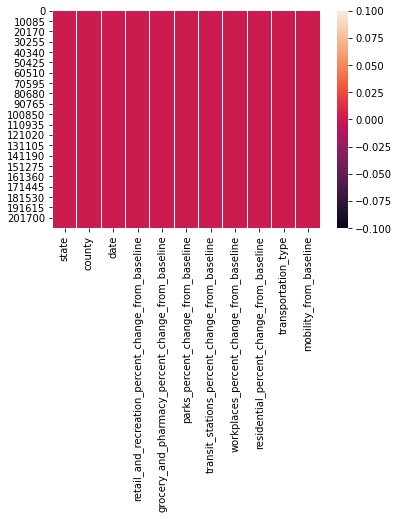

In [32]:
# boom 
is_na_df = merged_data.apply(pd.isna)
sns.heatmap(is_na_df)

# COVID-19 Test Data

In [33]:
covid_cases = pd.read_csv("https://usafactsstatic.blob.core.windows.net/public/data/covid-19/covid_confirmed_usafacts.csv")
covid_deaths = pd.read_csv("https://usafactsstatic.blob.core.windows.net/public/data/covid-19/covid_deaths_usafacts.csv")

In [34]:
covid_cases.head()

,countyFIPS,County Name,State,stateFIPS,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1001,Autauga County,AL,1,0,0,0,0,0,0,...,259,265,272,282,295,312,323,331,357,368
2,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,304,313,320,325,331,343,353,361,364,383
3,1005,Barbour County,AL,1,0,0,0,0,0,0,...,190,193,197,199,208,214,221,226,234,238
4,1007,Bibb County,AL,1,0,0,0,0,0,0,...,77,77,79,85,89,93,97,100,104,111


In [35]:
covid_deaths.head()

,countyFIPS,County Name,State,stateFIPS,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1001,Autauga County,AL,1,0,0,0,0,0,0,...,5,5,5,5,6,6,6,6,6,6
2,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,9,9,9,9,9,9,9,9,9,9
3,1005,Barbour County,AL,1,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
4,1007,Bibb County,AL,1,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1


In [36]:
apple_data_melted = by_county.melt(id_vars=["region", "transportation_type", 
                                            "sub-region", "country"], 
                                  var_name="date",
                                  value_name="mobility_from_baseline")

In [37]:
covid_cases = covid_cases.drop(["countyFIPS", "stateFIPS"], axis=1)
covid_cases_melted = covid_cases.melt(id_vars=["County Name", "State"],
                                      var_name="date",
                                      value_name="cases")

covid_deaths = covid_deaths.drop(["countyFIPS", "stateFIPS"], axis=1)
covid_deaths_melted = covid_deaths.melt(id_vars=["County Name", "State"],
                                      var_name="date",
                                      value_name="deaths")

covid_data = pd.merge(covid_cases_melted, covid_deaths_melted,
                      on=["County Name", "State", "date"])
covid_data.head()

,County Name,State,date,cases,deaths
0,Statewide Unallocated,AL,1/22/20,0,0
1,Autauga County,AL,1/22/20,0,0
2,Baldwin County,AL,1/22/20,0,0
3,Barbour County,AL,1/22/20,0,0
4,Bibb County,AL,1/22/20,0,0


In [38]:
# Thanks US lib
covid_data["State"] = covid_data["State"].apply(lambda x: us.states.lookup(x).name)

covid_data.rename({"County Name":"county",
                   "State":"state"}, axis=1, inplace=True)
covid_data.head()

,county,state,date,cases,deaths
0,Statewide Unallocated,Alabama,1/22/20,0,0
1,Autauga County,Alabama,1/22/20,0,0
2,Baldwin County,Alabama,1/22/20,0,0
3,Barbour County,Alabama,1/22/20,0,0
4,Bibb County,Alabama,1/22/20,0,0


In [39]:
covid_data["date"] = pd.to_datetime(covid_data["date"], infer_datetime_format=True)
merged_data["date"] = pd.to_datetime(merged_data["date"], infer_datetime_format=True)

all_data = pd.merge(merged_data, covid_data, on=["county", "state", "date"], how="left")
all_data.head()

,state,county,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,transportation_type,mobility_from_baseline,cases,deaths
0,Alabama,Autauga County,2020-02-15,5.0,7.0,15.164875,0.0,-4.0,-0.533183,driving,141.59,0.0,0.0
1,Alabama,Autauga County,2020-02-16,0.0,1.0,-23.000000,0.0,-4.0,-0.621118,driving,104.81,0.0,0.0
2,Alabama,Autauga County,2020-02-17,8.0,0.0,24.079480,0.0,-27.0,5.000000,driving,130.58,0.0,0.0
3,Alabama,Autauga County,2020-02-18,-2.0,0.0,4.451923,0.0,2.0,0.000000,driving,109.61,0.0,0.0
4,Alabama,Autauga County,2020-02-19,-2.0,0.0,7.138927,0.0,2.0,0.000000,driving,119.56,0.0,0.0


In [40]:
ordered_cols = [
    "cases",
    "deaths",
    "date",
    "county",
    "state",
    "retail_and_recreation_percent_change_from_baseline",
    "grocery_and_pharmacy_percent_change_from_baseline",
    "parks_percent_change_from_baseline",
    "transit_stations_percent_change_from_baseline",
    "workplaces_percent_change_from_baseline",
    "residential_percent_change_from_baseline",
    "mobility_from_baseline"
]
all_data = all_data[ordered_cols]

# Edit 6/16/20: Adding population density 

In [3]:
pop_data = pd.read_csv("https://www2.census.gov/programs-surveys/popest/datasets/2010-2019/counties/totals/co-est2019-alldata.csv", encoding="latin-1")
pop_data = pop_data[["STNAME", "CTYNAME", "POPESTIMATE2019"]]
pop_data.drop(pop_data.loc[pop_data["STNAME"] == pop_data["CTYNAME"]].index, inplace=True)
pop_data.rename({"STNAME":"state",
                 "CTYNAME":"county",
                 "POPESTIMATE2019":"county_population"},
               axis=1, inplace=True)

In [12]:
pop_data.loc[pop_data["county"] == 'Suffolk County'].head()

,state,county,county_population
1251,Massachusetts,Suffolk County,803907
1912,New York,Suffolk County,1476601


In [72]:
pop_data["state"].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',
       'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype=object)

In [43]:
land_data = pd.read_csv("../data/land_area.csv")
land_data.head()

,Areaname,STCOU,LND010190F,LND010190D,LND010190N1,LND010190N2,LND010200F,LND010200D,LND010200N1,LND010200N2,...,LND110210N1,LND110210N2,LND210190F,LND210190D,LND210190N1,LND210190N2,LND210200F,LND210200D,LND210200N1,LND210200N2
0,UNITED STATES,0,0,3787425.08,0,0,0,3794083.06,0,0,...,0,0,0,251083.35,0,0,0,256644.62,0,0
1,ALABAMA,1000,0,52422.94,0,0,0,52419.02,0,0,...,0,0,0,1672.71,0,0,0,1675.01,0,0
2,"Autauga, AL",1001,0,604.49,0,0,0,604.45,0,0,...,0,0,0,8.48,0,0,0,8.48,0,0
3,"Baldwin, AL",1003,0,2027.08,0,0,0,2026.93,0,0,...,0,0,0,430.55,0,0,0,430.58,0,0
4,"Barbour, AL",1005,0,904.59,0,0,0,904.52,0,0,...,0,0,0,19.59,0,0,0,19.61,0,0


In [44]:
def states_to_na(county_name):
    if ',' not in county_name:
        return np.nan
    else:
        return county_name

In [45]:
land_data["Areaname"] = land_data["Areaname"].apply(states_to_na) # if not county, then = NAN
land_data.dropna(inplace=True)
land_data["state"] = land_data["Areaname"].apply(lambda x: us.states.lookup(x[-2:]).name) # get state name from abbr
land_data["county"] = land_data["Areaname"].apply(lambda x: f"{x[:-4]} County") # match county name format to other data for join
louisiana_mask = (land_data["state"] == "Louisiana", "county")
land_data.loc[louisiana_mask] = land_data[land_data["state"] == "Louisiana"]["county"].apply(lambda x: f"{x.split()[0]} Parish")
land_data = land_data[["county", "state", "LND010190D"]].rename({"LND010190D":"land_area"}, axis=1)
land_data.head()

,county,state,land_area
2,Autauga County,Alabama,604.49
3,Baldwin County,Alabama,2027.08
4,Barbour County,Alabama,904.59
5,Bibb County,Alabama,625.50
6,Blount County,Alabama,650.65


In [46]:
density = pd.merge(land_data, pop_data, on=["county", "state"])
density["density"] = density["county_population"] / density["land_area"]
density.head()

,county,state,land_area,county_population,density
0,Autauga County,Alabama,604.49,55869,92.423365
1,Baldwin County,Alabama,2027.08,223234,110.125895
2,Barbour County,Alabama,904.59,24686,27.289711
3,Bibb County,Alabama,625.50,22394,35.801759
4,Blount County,Alabama,650.65,57826,88.874203


In [47]:
all_data = pd.merge(all_data, density, on=["county", "state"]).drop(["land_area", "county_population"], axis=1)

# Final Datasets

In [48]:
initial_date = pd.Timestamp(2020,2,15)
all_data["date"] = all_data["date"].apply(lambda x: (x - initial_date).days)


In [49]:
all_data.drop(all_data.loc[all_data["state"].isin(["Alaska", "Hawaii"])].index, inplace=True) # contiguous US only

Dataset 1: make state and county one column and convert to categorical column

In [50]:
unique_county_categorization = all_data.copy()
cols = ["county", "state"]
unique_county_categorization['county'] = unique_county_categorization[cols].apply(
                                                lambda row: ', '.join(row.values.astype(str)),
                                                axis=1)
unique_county_categorization.drop("state", axis=1, inplace=True)
unique_county_categorization["county"] = unique_county_categorization["county"].astype("category")
county_state_mappings = pd.Series(dict(enumerate(unique_county_categorization['county'].cat.categories)))
unique_county_categorization["county"] = unique_county_categorization["county"].cat.codes
county_state_mappings.to_csv("../data/cleaned_data/dataset_1_categories.csv")
unique_county_categorization.to_csv("../data/cleaned_data/dataset_1.csv")
unique_county_categorization.head()

,cases,deaths,date,county,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,mobility_from_baseline,density
0,0.0,0.0,0,76,5.0,7.0,15.164875,0.0,-4.0,-0.533183,141.59,92.423365
1,0.0,0.0,1,76,0.0,1.0,-23.000000,0.0,-4.0,-0.621118,104.81,92.423365
2,0.0,0.0,2,76,8.0,0.0,24.079480,0.0,-27.0,5.000000,130.58,92.423365
3,0.0,0.0,3,76,-2.0,0.0,4.451923,0.0,2.0,0.000000,109.61,92.423365
4,0.0,0.0,4,76,-2.0,0.0,7.138927,0.0,2.0,0.000000,119.56,92.423365


Dataset 2: make state and county unique categorical features

In [51]:
county_state_categorization = all_data.copy()
county_state_categorization[["county", "state"]] = county_state_categorization[["county", "state"]].astype("category")
county_dict = pd.Series(dict(enumerate(county_state_categorization['county'].cat.categories)))
state_dict = pd.Series(dict(enumerate(county_state_categorization['state'].cat.categories)))
county_state_categorization["county"] = county_state_categorization["county"].cat.codes
county_state_categorization["state"] = county_state_categorization["state"].cat.codes
county_state_categorization.to_csv("../data/cleaned_data/dataset_2.csv")
county_dict.to_csv("../data/cleaned_data/dataset_2_counties.csv")
state_dict.to_csv("../data/cleaned_data/dataset_2_states.csv")
county_state_categorization.head()

,cases,deaths,date,county,state,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,mobility_from_baseline,density
0,0.0,0.0,0,59,0,5.0,7.0,15.164875,0.0,-4.0,-0.533183,141.59,92.423365
1,0.0,0.0,1,59,0,0.0,1.0,-23.000000,0.0,-4.0,-0.621118,104.81,92.423365
2,0.0,0.0,2,59,0,8.0,0.0,24.079480,0.0,-27.0,5.000000,130.58,92.423365
3,0.0,0.0,3,59,0,-2.0,0.0,4.451923,0.0,2.0,0.000000,109.61,92.423365
4,0.0,0.0,4,59,0,-2.0,0.0,7.138927,0.0,2.0,0.000000,119.56,92.423365


Dataset 3: Use county populations as factor instead of county/state

In [52]:
all_data_pop = pd.merge(all_data, pop_data, on=["state", "county"])
all_data_pop.drop(["county", "state"], axis=1, inplace=True)
all_data_pop.to_csv("../data/cleaned_data/dataset_3.csv")
all_data_pop.head()

,cases,deaths,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,mobility_from_baseline,density,county_population
0,0.0,0.0,0,5.0,7.0,15.164875,0.0,-4.0,-0.533183,141.59,92.423365,55869
1,0.0,0.0,1,0.0,1.0,-23.000000,0.0,-4.0,-0.621118,104.81,92.423365,55869
2,0.0,0.0,2,8.0,0.0,24.079480,0.0,-27.0,5.000000,130.58,92.423365,55869
3,0.0,0.0,3,-2.0,0.0,4.451923,0.0,2.0,0.000000,109.61,92.423365,55869
4,0.0,0.0,4,-2.0,0.0,7.138927,0.0,2.0,0.000000,119.56,92.423365,55869


In [67]:
population_tagged = pd.merge(all_data, pop_data, on=["state", "county"])
cols = ["county", "state"]
population_tagged['county'] = population_tagged[cols].apply(
                                                lambda row: ', '.join(row.values.astype(str)),
                                                axis=1)
population_tagged.drop("state", axis=1, inplace=True)
population_tagged["county"] = population_tagged["county"].astype("category")
cs_mappings_tagged = pd.Series(dict(enumerate(population_tagged['county'].cat.categories)))
population_tagged["county"] = population_tagged["county"].cat.codes
population_tagged.to_csv("../data/cleaned_data/dataset_4.csv")
population_tagged.head()

,cases,deaths,date,county,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,mobility_from_baseline,density,county_population
0,0.0,0.0,0,76,5.0,7.0,15.164875,0.0,-4.0,-0.533183,141.59,92.423365,55869
1,0.0,0.0,1,76,0.0,1.0,-23.000000,0.0,-4.0,-0.621118,104.81,92.423365,55869
2,0.0,0.0,2,76,8.0,0.0,24.079480,0.0,-27.0,5.000000,130.58,92.423365,55869
3,0.0,0.0,3,76,-2.0,0.0,4.451923,0.0,2.0,0.000000,109.61,92.423365,55869
4,0.0,0.0,4,76,-2.0,0.0,7.138927,0.0,2.0,0.000000,119.56,92.423365,55869
